In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd 
import pandas as pd

In [2]:
# See the audio of the dataset
file_name = "test.wav"

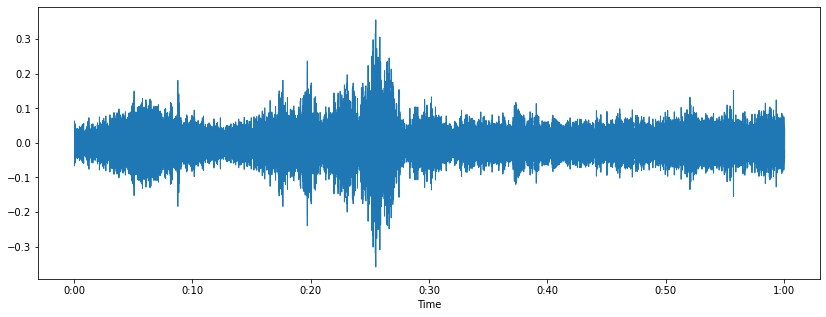

In [3]:
# Bullet sound
plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(file_name)
librosa.display.waveshow(data, sr = sample_rate)
ipd.Audio(file_name)

In [94]:
sample_rate,data

(22050,
 array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0231203e-05,
        2.3116412e-05, 0.0000000e+00], dtype=float32))

In [95]:
df = pd.read_csv("audio_files/UrbanSound8K/metadata/UrbanSound8K.csv")
df.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


# Data Preprocessing 

In [1]:
import numpy as np
import os
from dataset import extractor, feature_creator

In [2]:
features = feature_creator()

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)


9946 sounds loaded


In [5]:
#Creation of the dataset
df = pd.DataFrame(features,columns = ["features","class"])


In [7]:
#Split the dataset
X = np.array(df["features"].tolist())
y = np.array(df["class"].tolist())
tags = {}
for index, elem in enumerate(df["class"].unique()):
    tags[index]= elem
tags
    

{0: 'dog_bark',
 1: 'children_playing',
 2: 'car_horn',
 3: 'air_conditioner',
 4: 'street_music',
 5: 'gun_shot',
 6: 'siren',
 7: 'engine_idling',
 8: 'jackhammer',
 9: 'drilling',
 10: 'Background'}

In [11]:
y = np.array(pd.get_dummies(y))

In [12]:
# Train and test split
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Testing traditional  models
- RandomForestClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- KNeighborsClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighborsclassifier#sklearn.neighbors.KNeighborsClassifier
- Cross-validation-Score: https://scikit-learn.org/stable/modules/cross_validation.html

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, cross_validate


In [104]:
forest = RandomForestClassifier()
forest.fit(X_train,y_train)

RandomForestClassifier()

In [105]:
y_pred = forest.predict(X_test)

In [106]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       303
           1       0.80      1.00      0.89       200
           2       0.51      1.00      0.68        48
           3       0.39      0.97      0.55        99
           4       0.43      0.91      0.59       128
           5       0.67      0.99      0.80       168
           6       0.82      1.00      0.90       199
           7       0.52      1.00      0.69        48
           8       0.86      0.96      0.91       224
           9       0.70      1.00      0.83       168
          10       0.26      0.97      0.41        64

   micro avg       0.65      0.98      0.78      1649
   macro avg       0.63      0.98      0.74      1649
weighted avg       0.72      0.98      0.81      1649
 samples avg       0.65      0.65      0.65      1649



C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [107]:
# cross validation
cross_validate(forest, X_train, y_train, cv=10)

{'fit_time': array([5.39012623, 5.38368869, 5.33901334, 5.28899956, 5.32907033,
        5.40801406, 5.54100633, 5.51301599, 5.48806381, 5.38901067]),
 'score_time': array([0.06395459, 0.06200266, 0.06098676, 0.06000137, 0.06198502,
        0.06198764, 0.06099343, 0.05998111, 0.06199598, 0.0619874 ]),
 'test_score': array([0.61394102, 0.64745308, 0.64745308, 0.63270777, 0.63672922,
        0.63806971, 0.63538874, 0.5924933 , 0.62198391, 0.63758389])}


## KNN Model 
 The model that performs the best is KNeighborsClassifier with a accuracy avarage of 82%

In [108]:
knn = KNeighborsClassifier()

In [109]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [110]:
y_pred = knn.predict(X_test)

In [111]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       335
           1       0.95      0.91      0.93       261
           2       0.55      1.00      0.71        52
           3       0.85      0.76      0.80       278
           4       0.55      0.88      0.67       168
           5       0.79      0.94      0.86       208
           6       0.92      0.93      0.93       241
           7       0.71      0.73      0.72        89
           8       0.96      0.91      0.94       266
           9       0.86      0.95      0.91       216
          10       0.68      0.84      0.75       193

   micro avg       0.82      0.89      0.85      2307
   macro avg       0.80      0.89      0.83      2307
weighted avg       0.85      0.89      0.86      2307
 samples avg       0.82      0.82      0.82      2307



C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [112]:
# Cross validation of KNN model
cross_validate(knn, X_train, y_train, cv=10)

{'fit_time': array([0.00399995, 0.00596404, 0.00299931, 0.00300002, 0.00299931,
        0.00299883, 0.00299907, 0.00299931, 0.00299883, 0.00299954]),
 'score_time': array([0.28299999, 0.26100397, 0.25203395, 0.2510004 , 0.24896502,
        0.24699903, 0.24803758, 0.24579191, 0.24400115, 0.24604535]),
 'test_score': array([0.79088472, 0.81367292, 0.8230563 , 0.82573727, 0.8310992 ,
        0.79892761, 0.8150134 , 0.79892761, 0.80563003, 0.82416107])}

# Noise Recognition - Tensor Flow 

In [113]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [114]:
num_labels=y.shape[1]
num_labels

11

In [148]:
model=Sequential()
###first layer
model.add(Dense(750,input_shape=(50,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(750))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(750))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [149]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 750)               38250     
                                                                 
 activation_37 (Activation)  (None, 750)               0         
                                                                 
 dropout_28 (Dropout)        (None, 750)               0         
                                                                 
 dense_38 (Dense)            (None, 750)               563250    
                                                                 
 activation_38 (Activation)  (None, 750)               0         
                                                                 
 dropout_29 (Dropout)        (None, 750)               0         
                                                                 
 dense_39 (Dense)            (None, 750)              

In [150]:
model.compile(loss= "CategoricalCrossentropy", metrics= ["accuracy"], optimizer="adam")

In [151]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime 

In [152]:
checkpoint = ModelCheckpoint("noise.h5", save_best_only=True)
early_stop = EarlyStopping(patience=10, restore_best_weights=True)
callbacks =[
    checkpoint,
    early_stop
]
params = {
    "validation_data": (X_test,y_test),
    "epochs": 200, 
    "verbose": 1,
    "callbacks": callbacks,
    "batch_size":64,
}


In [153]:
%%time 
model.fit(X_train,y_train,**params)

Epoch 1/200
117/117 [==============================] - 2s 11ms/step - loss: 5.4404 - accuracy: 0.1995 - val_loss: 2.0631 - val_accuracy: 0.3619
Epoch 2/200
117/117 [==============================] - 1s 10ms/step - loss: 2.0974 - accuracy: 0.3031 - val_loss: 1.8076 - val_accuracy: 0.4684
Epoch 3/200
117/117 [==============================] - 1s 10ms/step - loss: 1.8463 - accuracy: 0.3821 - val_loss: 1.5595 - val_accuracy: 0.4950
Epoch 4/200
117/117 [==============================] - 1s 11ms/step - loss: 1.6440 - accuracy: 0.4542 - val_loss: 1.3607 - val_accuracy: 0.5919
Epoch 5/200
117/117 [==============================] - 1s 12ms/step - loss: 1.4764 - accuracy: 0.5111 - val_loss: 1.2310 - val_accuracy: 0.6534
Epoch 6/200
117/117 [==============================] - 1s 12ms/step - loss: 1.3385 - accuracy: 0.5631 - val_loss: 1.0918 - val_accuracy: 0.6880
Epoch 7/200
117/117 [==============================] - 1s 12ms/step - loss: 1.2283 - accuracy: 0.6049 - val_loss: 1.0387 - val_accuracy:

In [154]:
model.save("my_model")

INFO:tensorflow:Assets written to: my_model\assets


In [9]:
import tensorflow.keras as tf
model = tf.models.load_model(r'C:\Users\Dell\Documents\noise_recognition\backend\source\my_model')

In [14]:
y_pred = model.predict(X_test)
model.evaluate(X_test,y_test,verbose = 0)

[0.18575535714626312, 0.947728157043457]

In [15]:
np.argmax(y_pred, axis=1)

array([5, 1, 9, ..., 5, 1, 6], dtype=int64)

In [17]:
audio = extractor("test.wav")
audio = audio.reshape(1,-1)
prediction = model.predict(audio)
prediction = np.argmax(prediction, axis=1)

dog_bark
